In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import multivariate_normal
from scipy import signal

np.random.seed(0)
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
plt.rcParams['text.usetex'] = True

In [2]:
# def obj_fn(x):
#     return x**2 + 0.1 * x * np.sin(2*np.pi*10*x)

# def grad_fn(x):
#     return 2*x + 0.1*np.sin(2*np.pi*10*x) + 0.1*x*np.cos(2*np.pi*10*x)*2*np.pi*10

def obj_fn(x):
    return x**2 + 10 * x * np.sin(x)

def grad_fn(x):
    return 2*x + 10*np.sin(x) + 10*x*np.cos(x)


def obj_fn_test(x):
    return x**2

def grad_fn_test(x):
    return 2*x


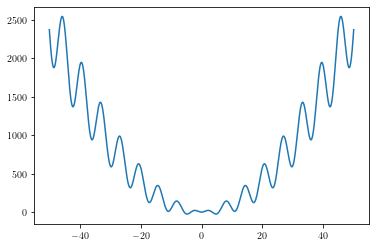

In [3]:
x = np.linspace(-50,50,1000)
y = obj_fn(x)
plt.plot(x,y)

## Graph

In [4]:
x1 = np.load('toy_prob_1_GD.npy')
y1 = 0.0 * x1
for i in range(len(x1)):
    y1[i] = obj_fn(x1[i])
    
x2 = np.load('toy_prob_1_MLGD_nu1e-1_1.npy')
y2 = 0.0 * x2
for i in range(len(x2)):
    y2[i] = obj_fn(x2[i])
    
bbin = []
for i in range(101):
    bbin.append(i-50)

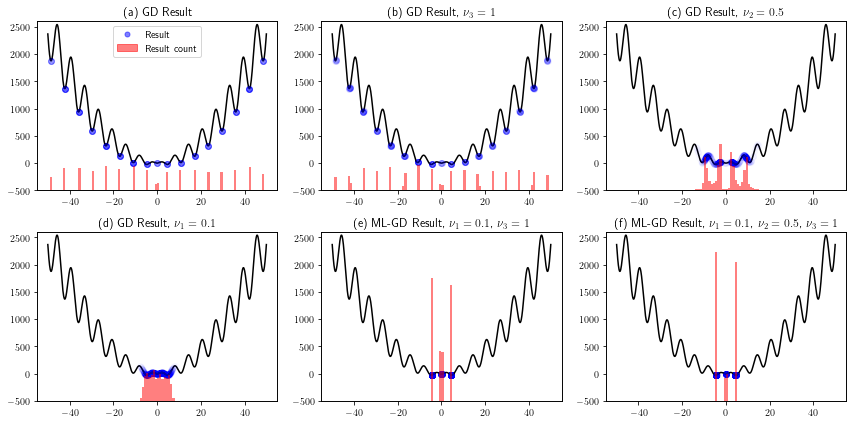

In [6]:
file_name = ['toy_prob_1_GD.npy',
             'toy_prob_1_MLGD_nu1.npy',
             'toy_prob_1_MLGD_nu5e-1.npy',
            'toy_prob_1_MLGD_nu1e-1.npy',
            'toy_prob_1_MLGD_nu1e-1_1.npy',
            'toy_prob_1_MLGD_nu1e-1_5e-1_1.npy']
title_name = ['(a) GD Result',
              r'(b) GD Result, $\nu_3 =1$',
              r'(c) GD Result, $\nu_2 =0.5$',
              r'(d) GD Result, $\nu_1 =0.1$',
              r'(e) ML-GD Result, $\nu_1 = 0.1$, $\nu_3 = 1$',
              r'(f) ML-GD Result, $\nu_1 = 0.1$, $\nu_2 = 0.5$, $\nu_3 = 1$',]

fig, axs = plt.subplots(2, 3, figsize=[12,6])
axs = axs.flatten()

legend_elements = [Line2D([0], [0], marker='o', color='b', label='Result',
                         markerfacecolor='b', markersize=5, lw=0, alpha=0.5),
                   Patch(facecolor='red', edgecolor='r',
                         label='Result count', alpha=0.5)]

for i in range(6):
    
    x1 = np.load(file_name[i])
    y1 = 0.0 * x1
    for ind in range(len(x1)):
        y1[ind] = obj_fn(x1[ind])
    
    ax1 = axs[i]
    ax2 = ax1.twinx()
    ax1.plot(x, y, 'k')
    ax1.plot(x1,y1,'bo',alpha=0.01)
    ax2.hist(x1,bins=bbin,density=True,color='r', alpha=0.5)
    
    ax1.set_ylim([-500,2600])
    ax2.set_ylim([0,0.5])
    ax2.get_yaxis().set_ticks([])
    ax1.set_title(title_name[i])
    if i == 0:
        ax1.legend(handles=legend_elements, loc=9)
    
fig.tight_layout()

plt.savefig('toy_prob_1.jpeg')
# plt.savefig('/Users/lida/Desktop/ML_opt/paper/images/toy_prob_1.png')
# plt.savefig('/Users/lida/Desktop/ML_opt/paper/images/toy_prob_1.pdf')

array([<AxesSubplot:>, <AxesSubplot:>], dtype=object)

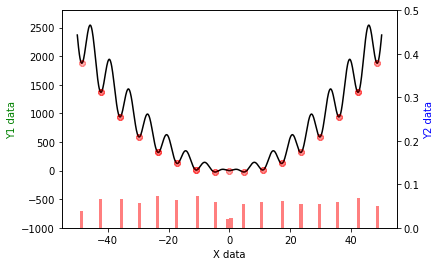

In [83]:
fig, ax1 = plt.subplots()

x1 = np.load('toy_prob_1_GD.npy')
y1 = 0.0 * x1
for i in range(len(x1)):
    y1[i] = obj_fn(x1[i])

ax2 = ax1.twinx()
ax1.plot(x, y, 'k')
ax1.plot(x1,y1,'ro',alpha=0.008)
ax2.hist(x1,bins=bbin,density=True,color='r', alpha=0.5)

ax1.set_xlabel('X data')
ax1.set_ylabel('Y1 data', color='g')
ax2.set_ylabel('Y2 data', color='b')
ax1.set_ylim([-1000,2800])
ax2.set_ylim([0,0.5])

plt.show()

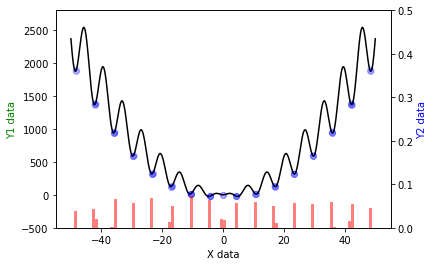

In [84]:
fig, ax1 = plt.subplots()

x1 = np.load('toy_prob_1_MLGD_nu1.npy')
y1 = 0.0 * x1
for i in range(len(x1)):
    y1[i] = obj_fn(x1[i])

ax2 = ax1.twinx()
ax1.plot(x, y, 'k')
ax1.plot(x1,y1,'bo',alpha=0.008)
ax2.hist(x1,bins=bbin,density=True,color='r', alpha=0.5)

ax1.set_xlabel('X data')
ax1.set_ylabel('Y1 data', color='g')
ax2.set_ylabel('Y2 data', color='b')
ax1.set_ylim([-500,2800])
ax2.set_ylim([0,0.5])

plt.show()

## Gradient Descent

In [4]:
def gradient_descent(obj_fn, grad_fn, x0, alpha, iter_num):
    x1 = 0.0 * x0
    x_trace = np.zeros([iter_num])
    for i in range(iter_num):
        # print(obj_fn(x0))
        grad = grad_fn(x0)
        x1 = x0 - alpha * grad
        x0 = x1
        x_trace[i] = x0
    return x0, x_trace

In [5]:
# test gradient descent
x0 = np.array([20.0])
alpha = 1e-2
iter_num = 100

xx, x_trace = gradient_descent(obj_fn, grad_fn, x0, alpha, iter_num)
print(xx)

[17.13603878]


In [12]:
np.random.seed(0)

alpha = 1e-3
iter_num = 1000

N_ex = 1000
x0_set = np.random.uniform(low=-50.0, high=50.0, size=N_ex)
xx_set = np.zeros(N_ex)
for i in range(N_ex):
    x0 = x0_set[i]
    xx, x_trace = gradient_descent(obj_fn, grad_fn, x0, alpha, iter_num)
    xx_set[i] = xx
    
    
np.save('toy_prob_1_GD.npy', xx_set)

(-50.0, 50.0)

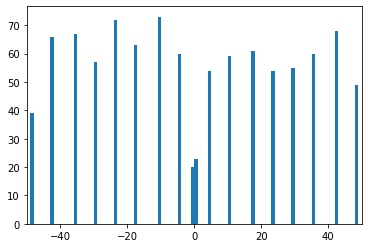

In [13]:
bbin = []
for i in range(101):
    bbin.append(i-50)
plt.hist(xx_set, bins=bbin)
plt.xlim([-50,50])

In [418]:
grad = grad_fn(x0)
grad = grad / np.linalg.norm(grad)
print(grad)

-1.0


## ML-GD

In [14]:
def ML_GD(obj_fn, grad_fn, x0, alpha, iter_num, nu, Nr):
    x1 = 0.0 * x0
    x_trace = np.zeros([iter_num,1])
    
    for i in range(iter_num):
        # print(obj_fn(x0))
        
        x_sample = np.random.normal(x0, 1/nu, Nr)
        grad_sample = 0.0 * x_sample
        
        for j in range(Nr):
            grad_sample[j] = grad_fn(x_sample[j])
            
        grad = sum(grad_sample) / Nr
        x1 = x0 - alpha * grad
        x0 = x1
        
        x_trace[i] = x0
    return x0, x_trace

In [15]:
# test gradient descent
x0 = np.array([100])
alpha = 5e-2
iter_num = 1000
nu = 1
Nr = 100

xx, x_trace = ML_GD(obj_fn, grad_fn, x0, alpha, iter_num, nu, Nr)
print(xx)

[4.34982266]


In [16]:
np.random.seed(0)
x_sample = np.random.normal(x0, 1/nu, Nr)

(array([ 1.,  5.,  7., 13., 17., 18., 16., 11.,  7.,  5.]),
 array([-419.6010788 , -414.77833436, -409.95558992, -405.13284548,
        -400.31010104, -395.4873566 , -390.66461216, -385.84186773,
        -381.01912329, -376.19637885, -371.37363441]),
 <BarContainer object of 10 artists>)

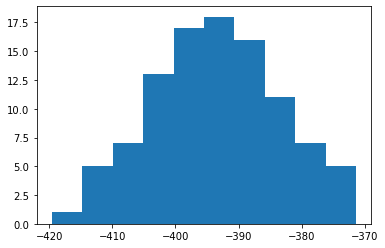

In [266]:
plt.hist(x_sample)

In [26]:
np.random.seed(0)

alpha = 1e-3
iter_num = 1000
Nr = 10
nu = 0.01

N_ex = 1000
x0_set = np.random.uniform(low=-50.0, high=50.0, size=N_ex)
xx_set = np.zeros(N_ex)
for i in range(N_ex):
    x0 = x0_set[i]
    xx, x_trace = ML_GD(obj_fn, grad_fn, x0, alpha, iter_num, nu, Nr)
    xx_set[i] = xx

np.save('toy_prob_1_MLGD_nu1e-2.npy', xx_set)

(-50.0, 50.0)

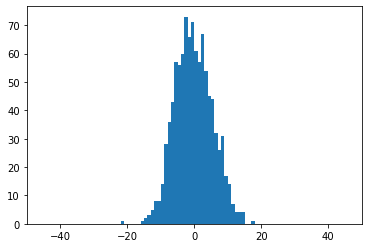

In [27]:
bbin = []
for i in range(101):
    bbin.append(i-50)
plt.hist(xx_set,bins=bbin)
plt.xlim([-50,50])

In [28]:
np.random.seed(0)

alpha = 1e-3
iter_num = 1000
Nr = 10
nu = 0.1

N_ex = 1000
x0_set = np.random.uniform(low=-50.0, high=50.0, size=N_ex)
xx_set = np.zeros(N_ex)
for i in range(N_ex):
    x0 = x0_set[i]
    xx, x_trace = ML_GD(obj_fn, grad_fn, x0, alpha, iter_num, nu, Nr)
    xx_set[i] = xx

np.save('toy_prob_1_MLGD_nu1e-1.npy', xx_set)

(-50.0, 50.0)

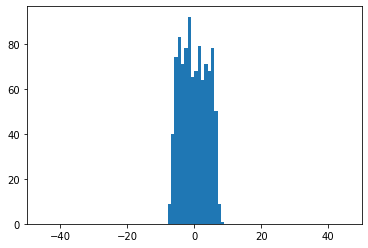

In [29]:
bbin = []
for i in range(101):
    bbin.append(i-50)
plt.hist(xx_set,bins=bbin)
plt.xlim([-50,50])

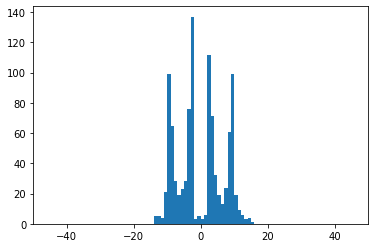

In [30]:
np.random.seed(0)

alpha = 1e-3
iter_num = 1000
Nr = 10
nu = 0.5

N_ex = 1000
x0_set = np.random.uniform(low=-50.0, high=50.0, size=N_ex)
xx_set = np.zeros(N_ex)
for i in range(N_ex):
    x0 = x0_set[i]
    xx, x_trace = ML_GD(obj_fn, grad_fn, x0, alpha, iter_num, nu, Nr)
    xx_set[i] = xx

bbin = []
for i in range(101):
    bbin.append(i-50)
plt.hist(xx_set,bins=bbin)
plt.xlim([-50,50])

np.save('toy_prob_1_MLGD_nu5e-1.npy', xx_set)

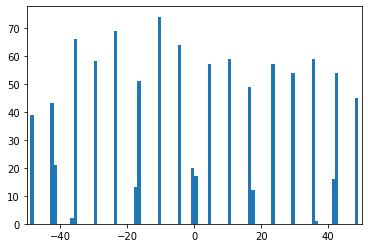

In [31]:
np.random.seed(0)

alpha = 1e-3
iter_num = 1000
Nr = 10
nu = 1

N_ex = 1000
x0_set = np.random.uniform(low=-50.0, high=50.0, size=N_ex)
xx_set = np.zeros(N_ex)
for i in range(N_ex):
    x0 = x0_set[i]
    xx, x_trace = ML_GD(obj_fn, grad_fn, x0, alpha, iter_num, nu, Nr)
    xx_set[i] = xx

bbin = []
for i in range(101):
    bbin.append(i-50)
plt.hist(xx_set,bins=bbin)
plt.xlim([-50,50])

np.save('toy_prob_1_MLGD_nu1.npy', xx_set)

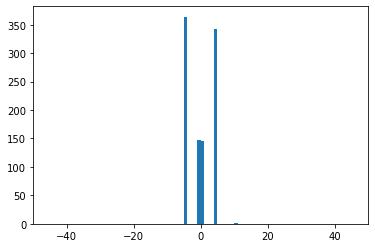

In [32]:
np.random.seed(0)

alpha = 1e-3
iter_num = 1000
Nr = 10
N_ex = 1000

nu = 0.1
x0_set = np.random.uniform(low=-50.0, high=50.0, size=N_ex)
xx_set = np.zeros(N_ex)
for i in range(N_ex):
    x0 = x0_set[i]
    xx, x_trace = ML_GD(obj_fn, grad_fn, x0, alpha, iter_num, nu, Nr)
    xx_set[i] = xx

nu = 1
x0_set = np.random.uniform(low=-50.0, high=50.0, size=N_ex)
xxx_set = np.zeros(N_ex)
for i in range(N_ex):
    x0 = xx_set[i]
    xx, x_trace = ML_GD(obj_fn, grad_fn, x0, alpha, iter_num, nu, Nr)
    xxx_set[i] = xx

bbin = []
for i in range(101):
    bbin.append(i-50)
plt.hist(xxx_set,bins=bbin)
plt.xlim([-50,50])

np.save('toy_prob_1_MLGD_nu1e-1_1.npy', xxx_set)

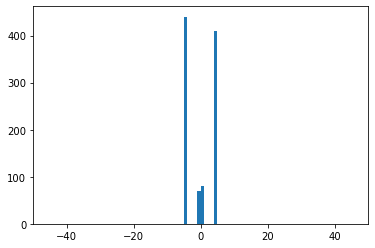

In [33]:
np.random.seed(0)

alpha = 1e-3
iter_num = 1000
Nr = 10
N_ex = 1000

nu = 0.1
x0_set = np.random.uniform(low=-50.0, high=50.0, size=N_ex)
xx_set = np.zeros(N_ex)
for i in range(N_ex):
    x0 = x0_set[i]
    xx, x_trace = ML_GD(obj_fn, grad_fn, x0, alpha, iter_num, nu, Nr)
    xx_set[i] = xx

nu = 0.5
x0_set = np.random.uniform(low=-50.0, high=50.0, size=N_ex)
xxx_set = np.zeros(N_ex)
for i in range(N_ex):
    x0 = xx_set[i]
    xx, x_trace = ML_GD(obj_fn, grad_fn, x0, alpha, iter_num, nu, Nr)
    xxx_set[i] = xx
    
nu = 1
xxxx_set = np.zeros(N_ex)
for i in range(N_ex):
    x0 = xxx_set[i]
    xx, x_trace = ML_GD(obj_fn, grad_fn, x0, alpha, iter_num, nu, Nr)
    xxxx_set[i] = xx

bbin = []
for i in range(101):
    bbin.append(i-50)
plt.hist(xxxx_set,bins=bbin)
plt.xlim([-50,50])

np.save('toy_prob_1_MLGD_nu1e-1_5e-1_1.npy', xxxx_set)